# Import the Liabrary

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import pickle

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Load Data

In [4]:
df = pd.read_csv('student-2018-2023_NEW.csv')

In [5]:
df.columns

Index(['STUDENTID', 'COURSECODE', 'TAKENYEAR', 'TERM', 'CREDIT',
       'MIDTERMGRADE', 'FINALGRADE', 'IS_SPECIAL_STUDY', 'DONOR', 'AGE',
       'GENDER', 'STUDENTTYPE', 'SCHOOL', 'PROGRAMFIELDOFSTUDY',
       'PREVIOUSDEGREE', 'PREVIOUSDEGREE_related', 'PREVIOUSINSTITUTE', 'GPA',
       'MAXGPA', 'ADMISSIONDATE', 'ESTIMATEDGRADUATIONDATE',
       'ACTUALGRADUATIONDATE', 'COUNTRY', 'STATEREGION', 'MARITALSTATUS',
       'ENGLISHSCORE'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
df.shape

(34096, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34096 entries, 0 to 34095
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STUDENTID                34096 non-null  int64  
 1   COURSECODE               34096 non-null  object 
 2   TAKENYEAR                34096 non-null  int64  
 3   TERM                     34096 non-null  object 
 4   CREDIT                   34096 non-null  float64
 5   MIDTERMGRADE             16814 non-null  object 
 6   FINALGRADE               27950 non-null  object 
 7   IS_SPECIAL_STUDY         34096 non-null  object 
 8   DONOR                    34078 non-null  object 
 9   AGE                      34055 non-null  float64
 10  GENDER                   34096 non-null  object 
 11  STUDENTTYPE              34096 non-null  object 
 12  SCHOOL                   34096 non-null  object 
 13  PROGRAMFIELDOFSTUDY      34096 non-null  object 
 14  PREVIOUSDEGREE        

In [8]:
df.head()

,STUDENTID,COURSECODE,TAKENYEAR,TERM,CREDIT,MIDTERMGRADE,FINALGRADE,IS_SPECIAL_STUDY,DONOR,AGE,...,PREVIOUSINSTITUTE,GPA,MAXGPA,ADMISSIONDATE,ESTIMATEDGRADUATIONDATE,ACTUALGRADUATIONDATE,COUNTRY,STATEREGION,MARITALSTATUS,ENGLISHSCORE
0,239358817,ED72.12,2018,August,3.0,A,A,N,SELF SUPPORT,43.0,...,"University of Dhaka, Bangladesh",333,500,43315,45138,45133,Bangladesh,"Dhaka, Dhaka",Married,7
1,239358817,ED72.43,2018,August,3.0,B,A,N,SELF SUPPORT,43.0,...,"University of Dhaka, Bangladesh",333,500,43315,45138,45133,Bangladesh,"Dhaka, Dhaka",Married,7
2,239359441,AT63.0115,2018,August,15.0,NaN,NaN,N,JAPAN 2016,36.0,...,"Asian Institute of Technology, Thailand",3.59,4,42951,45138,45133,Nepal,0,Single,E
3,239359441,AT76.18,2018,January,2.0,B,A,N,JAPAN 2016,36.0,...,"Asian Institute of Technology, Thailand",3.59,4,42951,45138,45133,Nepal,0,Single,E
4,239359441,AT76.9041,2018,January,1.0,NaN,B+,N,JAPAN 2016,36.0,...,"Asian Institute of Technology, Thailand",3.59,4,42951,45138,45133,Nepal,0,Single,E


In [9]:
df.columns

Index(['STUDENTID', 'COURSECODE', 'TAKENYEAR', 'TERM', 'CREDIT',
       'MIDTERMGRADE', 'FINALGRADE', 'IS_SPECIAL_STUDY', 'DONOR', 'AGE',
       'GENDER', 'STUDENTTYPE', 'SCHOOL', 'PROGRAMFIELDOFSTUDY',
       'PREVIOUSDEGREE', 'PREVIOUSDEGREE_related', 'PREVIOUSINSTITUTE', 'GPA',
       'MAXGPA', 'ADMISSIONDATE', 'ESTIMATEDGRADUATIONDATE',
       'ACTUALGRADUATIONDATE', 'COUNTRY', 'STATEREGION', 'MARITALSTATUS',
       'ENGLISHSCORE'],
      dtype='object')

## Drop column that not necessary

In [10]:
df = df.drop(['PREVIOUSDEGREE','STUDENTTYPE','PREVIOUSINSTITUTE', 'GPA','MAXGPA','PROGRAMFIELDOFSTUDY', 'ADMISSIONDATE', 'ESTIMATEDGRADUATIONDATE', 'ACTUALGRADUATIONDATE','STATEREGION','IS_SPECIAL_STUDY','COURSECODE'],axis=1)

In [11]:
df.columns

Index(['STUDENTID', 'TAKENYEAR', 'TERM', 'CREDIT', 'MIDTERMGRADE',
       'FINALGRADE', 'DONOR', 'AGE', 'GENDER', 'SCHOOL',
       'PREVIOUSDEGREE_related', 'COUNTRY', 'MARITALSTATUS', 'ENGLISHSCORE'],
      dtype='object')

## Rename

In [12]:
df = df.rename(columns={
    'STUDENTID': 'student_id',
    'AGE': 'age',
    'GENDER': 'gender',
    'STUDENTTYPE': 'student_type',
    'SCHOOL': 'school',
    'COUNTRY': 'country',
    'MARITALSTATUS': 'maritalstatus',
    'ENGLISHSCORE': 'english_score',
    'COURSECODE': 'coursecode',
    'TAKENYEAR': 'taken_year',
    'TERM': 'term',
    'CREDIT': 'credit',
    'FINALGRADE': 'final_grade',
    'MIDTERMGRADE': 'midterm_grade',
    'DONOR': 'donor'
})

In [13]:
df.columns

Index(['student_id', 'taken_year', 'term', 'credit', 'midterm_grade',
       'final_grade', 'donor', 'age', 'gender', 'school',
       'PREVIOUSDEGREE_related', 'country', 'maritalstatus', 'english_score'],
      dtype='object')

## Find the grade & total credit for first semester

In [14]:
df['term'].value_counts()

term
January     15874
August      15034
InterSem     3188
Name: count, dtype: int64

In [15]:
#Drop the row that contain Intersem term
df = df[df['term'] != 'InterSem']
# Assign values to the 'term'
term_order_map = {'January': 1, 'August': 2}
df['term'] = df['term'].map(term_order_map)

In [16]:
df['term'].value_counts()

term
1    15874
2    15034
Name: count, dtype: int64

In [17]:
df['final_grade'].value_counts()

final_grade
B+    8815
B     7695
A     5682
C+    1609
C      359
I      356
P      323
F      173
D       52
N       15
X        2
Name: count, dtype: int64

In [18]:
grade_mapping = {
    'A': 4.0,
    'B+': 3.3,
    'B': 3.0,
    'C+': 2.3,
    'C': 2.0,
    'D': 1.0,
    'F': 0.0,
    'P': np.nan,  # Assign NaN for Pass as it usually doesn't count towards GPA
    'I': np.nan,  # Assign NaN for Incomplete
    'N': np.nan,  # Assign NaN for Not passed
    'X': np.nan   # Assign NaN for No grade
}
df['final_grade'] = df['final_grade'].map(grade_mapping)
df['midterm_grade'] = df['midterm_grade'].map(grade_mapping)

In [19]:
df.columns

Index(['student_id', 'taken_year', 'term', 'credit', 'midterm_grade',
       'final_grade', 'donor', 'age', 'gender', 'school',
       'PREVIOUSDEGREE_related', 'country', 'maritalstatus', 'english_score'],
      dtype='object')

In [20]:
# Drop rows with NaN in the 'final_grade' column
df = df.dropna(subset=['final_grade'])

In [21]:
import pandas as pd

def process_student(group):
    # Find the earliest year the student enrolled
    min_year = group['taken_year'].min()
    earliest_data = group[group['taken_year'] == min_year]

    # Determine the term to select
    terms = earliest_data['term'].unique()
    selected_term = 1 if 1 in terms else 2

    # Filter data for the selected term in the earliest year
    term_data = earliest_data[earliest_data['term'] == selected_term]

    # Calculate average grade and total credits
    avg_grade = term_data['final_grade'].mean()
    avg_grade_midterm = term_data['midterm_grade'].mean()
    sum_credit = term_data['credit'].sum()

    return pd.Series({
        'admission_year': min_year,   #FFirst year
        'first_term':selected_term,
        'average_grade': avg_grade,
        'average_midterm_grade':avg_grade_midterm,
        'total_credit': sum_credit
    })


df1 = df.groupby('student_id').apply(process_student).reset_index()

# Display the result
print(df1.head())

   student_id  admission_year  first_term  average_grade  \
0   239298033          2020.0         1.0          3.300   
1   239298049          2018.0         1.0          3.060   
2   239298065          2018.0         1.0          4.000   
3   239298097          2020.0         2.0          3.225   
4   239298145          2018.0         1.0          4.000   

   average_midterm_grade  total_credit  
0               3.000000           9.0  
1                    NaN          11.0  
2               3.475000          12.0  
3               2.866667          12.0  
4                    NaN           3.0  


C:\Users\Aimmy\AppData\Local\Temp\ipykernel_8028\296688459.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df.groupby('student_id').apply(process_student).reset_index()


In [22]:
df = df.drop(columns=['taken_year', 'term', 'credit', 'final_grade'])
df = df.drop_duplicates()

In [23]:
df = pd.merge(df, df1, on='student_id', how='inner')

## Make the school easy to understand

In [24]:
df['school'].value_counts()

school
School of Engineering and Technology                                                       6272
School of Environment, Resources and Development                                           3582
School of Environment, Resources and Development - School of Engineering and Technology     235
School of Management                                                                        102
AIT Open Degrees                                                                             24
School of Environment, Resources and Development - School of Management                      13
Name: count, dtype: int64

In [25]:
school_mapping = {
    'School of Engineering and Technology': 'SET',
    'School of Environment, Resources and Development': 'SERD',
    'School of Environment, Resources and Development - School of Engineering and Technology': 'SET',
    'School of Environment, Resources and Development - School of Management': 'SOM',
    'AIT Open Degrees':'SET',
    'School of Management' : 'SOM'
}

df['school'] = df['school'].map(school_mapping)

In [26]:
df['school'].value_counts()

school
SET     6531
SERD    3582
SOM      115
Name: count, dtype: int64

In [27]:
df.columns

Index(['student_id', 'midterm_grade', 'donor', 'age', 'gender', 'school',
       'PREVIOUSDEGREE_related', 'country', 'maritalstatus', 'english_score',
       'admission_year', 'first_term', 'average_grade',
       'average_midterm_grade', 'total_credit'],
      dtype='object')

## Replace the E in English score with 6 (Pass criteria)

In [28]:
df['english_score'].value_counts()

english_score
E      2747
5.5    2017
6      1937
5      1749
6.5     853
7       500
7.5     190
8       136
8.5      60
4.5      16
Name: count, dtype: int64

In [29]:
# Replace 'E' (exempt) with the minimum criteria to pass (6 score)
df['english_score'] = df['english_score'].replace(['E'], 6)

# Convert the column to numeric type, just in case if it's not
df['english_score'] = pd.to_numeric(df['english_score'])

### Mapping

In [30]:
df['country'].value_counts()

country
Thailand      2995
India         1497
Myanmar       1474
Nepal         1095
Bangladesh     516
              ... 
Brazil           2
Russia           2
Zimbabwe         2
Eritrea          2
Spain            1
Name: count, Length: 62, dtype: int64

In [31]:
#Mapping for country
east_asia = ["China", "Japan", "Mongolia", "Taiwan", "Korea"]
southeast_asia = ["Brunei", "Cambodia", "Indonesia", "Lao PDR", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Timor-Leste", "Viet Nam"]
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
west_asia = ["Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Qatar", "Saudi Arabia", "Syria", "Turkey", "United Arab Emirates", "Yemen"]

# Map countries to regions
country_region_map = {country: "East Asia" for country in east_asia}
country_region_map.update({country: "Southeast Asia" for country in southeast_asia})
country_region_map.update({country: "South Asia" for country in south_asia})
country_region_map.update({country: "West Asia" for country in west_asia})

# Defaulting to "Other" for countries not listed in the regions above
df['country'] = df['country'].apply(lambda x: country_region_map.get(x, "Other"))

# Display value counts
print(df['country'].value_counts())

country
Southeast Asia    5528
South Asia        4005
Other              441
East Asia          241
West Asia           13
Name: count, dtype: int64


In [32]:
df['donor'].value_counts()

donor
SELF SUPPORT                                 3639
SPONSOR (WITH MOU)                           1294
RTG FELLOWSHIPS 2019                          464
EXTERNAL FUNDED                               290
RTG FELLOWSHIPS 2017                          250
                                             ... 
BANGLADESH EMBASSY BANGABANDHU CHAIR FUND       2
AITAA SRI LANKA CHAPTER                         2
AI CENTER, AIT                                  2
RTG FELLOWSHIPS 2015                            1
DAAD 2016                                       1
Name: count, Length: 112, dtype: int64

In [33]:
def map_scholarship(donor):
    if pd.isna(donor):
        return 'Other'  # Handle NaN values by returning 'Other'
    elif 'SELF SUPPORT' in donor:
        return 'selfsupport'
    elif 'RTG FELLOWSHIPS' in donor:
        return 'RTG'
    elif 'SPONSOR (WITH MOU)' in donor:
        return 'sponsor with mou'
    elif 'THAILAND (HMKING)' in donor or 'THAILAND (HM QUEEN)' in donor:
        return 'thailand (HMKING & HMQUEEN)'
    else:
        return 'Other'


# Apply the function to the 'Donor' column
df['donor'] = df['donor'].apply(map_scholarship)

In [34]:
df['donor'].value_counts()

donor
selfsupport                    3643
Other                          2538
RTG                            1758
sponsor with mou               1294
thailand (HMKING & HMQUEEN)     995
Name: count, dtype: int64

## Drop the unique identifier which can't use to predict

In [35]:
#Drop the unique identifier which can't use to predict
df = df.drop('student_id', axis=1)

In [36]:
df.dtypes

midterm_grade             float64
donor                      object
age                       float64
gender                     object
school                     object
PREVIOUSDEGREE_related     object
country                    object
maritalstatus              object
english_score             float64
admission_year            float64
first_term                float64
average_grade             float64
average_midterm_grade     float64
total_credit              float64
dtype: object

## Univariate Analysis

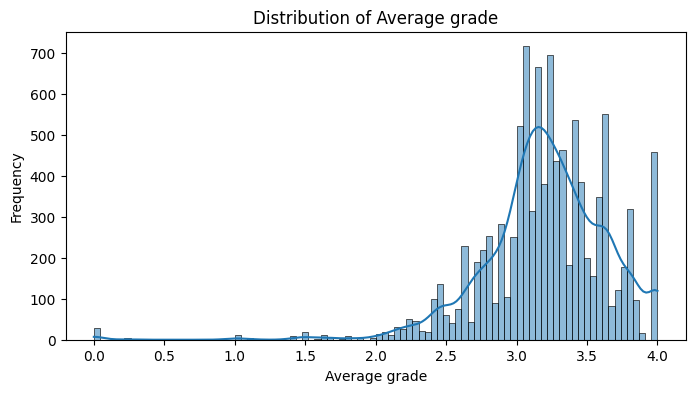

In [37]:
# Histogram for 'Average grade'
plt.figure(figsize=(8, 4))
sns.histplot(df['average_grade'], kde=True)
plt.title('Distribution of Average grade')
plt.xlabel('Average grade')
plt.ylabel('Frequency')
plt.show()

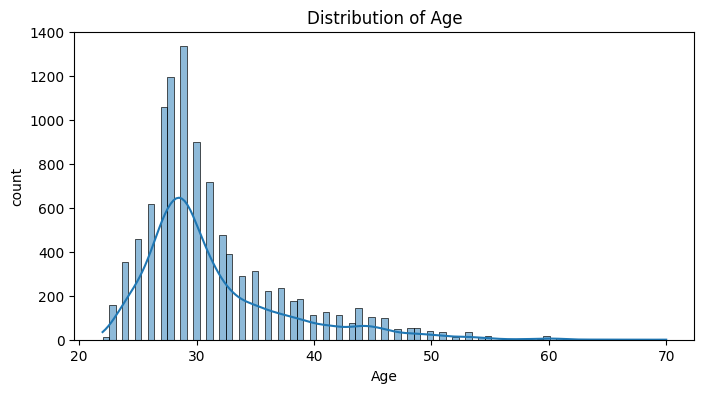

In [38]:
# Histogram for 'age'
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

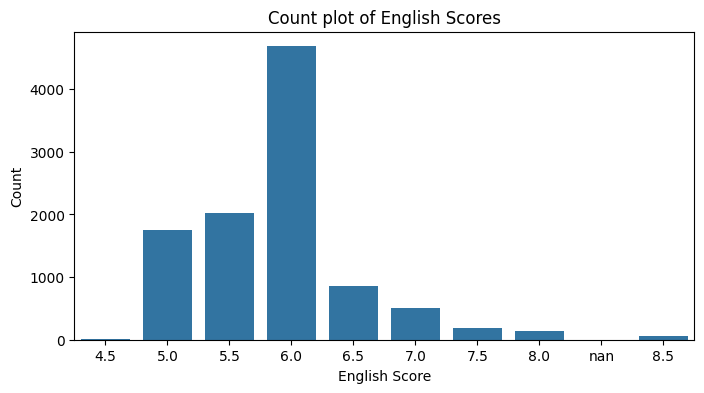

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(x='english_score', data=df, order=sorted(df['english_score'].unique()))
plt.title('Count plot of English Scores')
plt.xlabel('English Score')
plt.ylabel('Count')
plt.show()

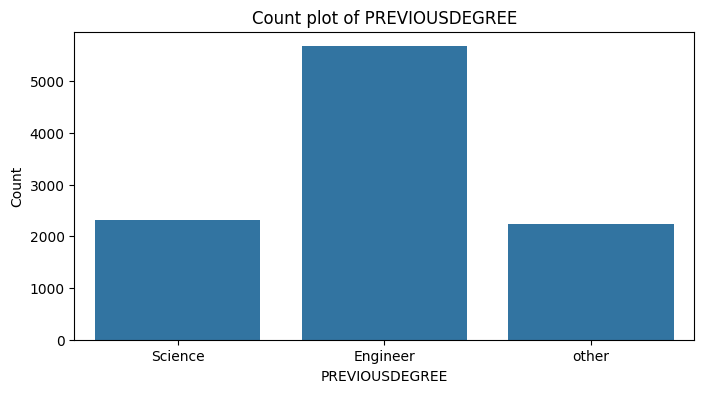

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(x='PREVIOUSDEGREE_related', data=df)
plt.title('Count plot of PREVIOUSDEGREE')
plt.xlabel('PREVIOUSDEGREE')
plt.ylabel('Count')
plt.show()

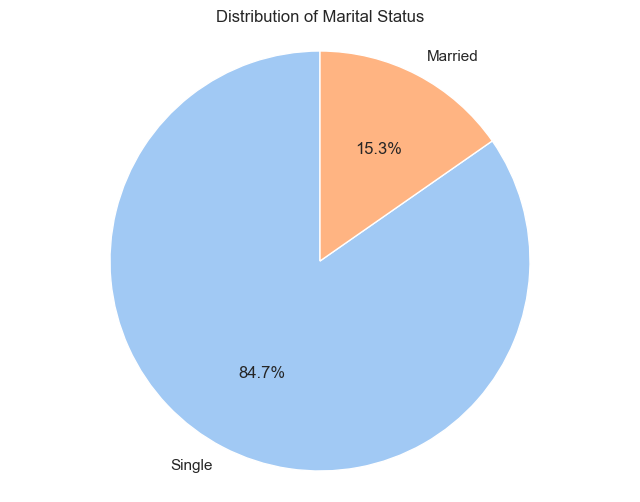

In [41]:
sns.set(style="whitegrid")
marital_status_counts = df['maritalstatus'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Marital Status')
plt.axis('equal')
plt.show()


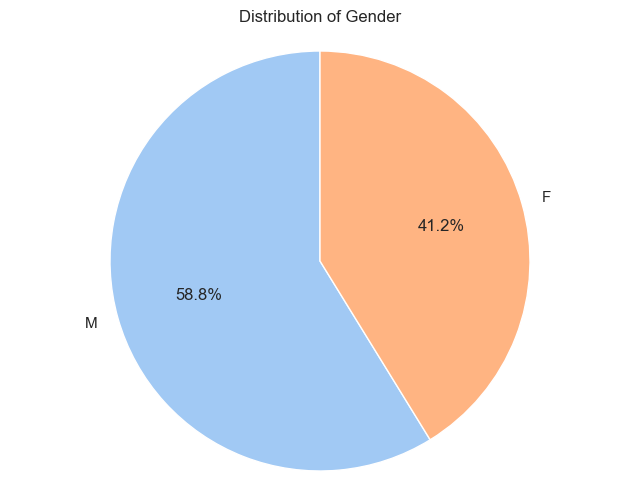

In [42]:
sns.set(style="whitegrid")
gender_counts = df['gender'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

Multivariate Analysis

In [43]:
gender_avg_grade = df.groupby('gender')['average_grade'].mean().reset_index()
gender_avg_grade

,gender,average_grade
0,F,3.234947
1,M,3.184678


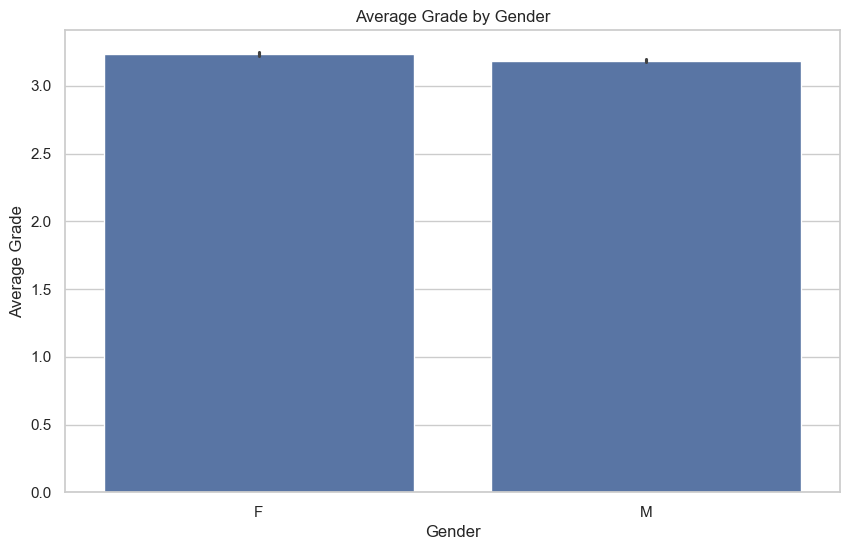

In [44]:
# Bar Plot for Gender vs Average Grade
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='average_grade', data=df)
plt.title('Average Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.show()

In [45]:
maritalstatus_avg_grade = df.groupby('maritalstatus')['average_grade'].mean().reset_index()
maritalstatus_avg_grade

,maritalstatus,average_grade
0,Married,3.255182
1,Single,3.196393


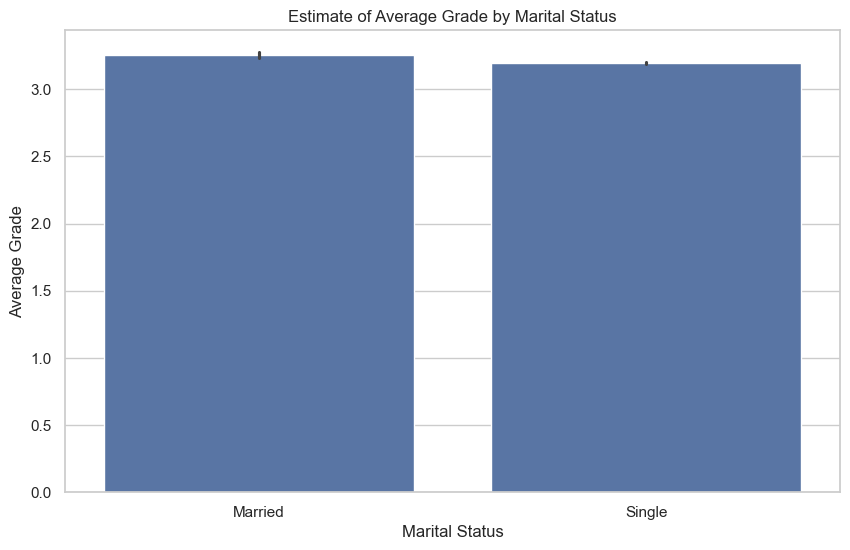

In [46]:
# Bar Plot for maritalstatus vs Average Grade
plt.figure(figsize=(10, 6))
sns.barplot(x='maritalstatus', y='average_grade', data=df)
plt.title('Estimate of Average Grade by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Grade')
plt.show()

In [47]:
english_score_avg_grade = df.groupby('english_score')['average_grade'].mean().reset_index()
english_score_avg_grade

,english_score,average_grade
0,4.5,3.356250
1,5.0,3.061303
2,5.5,3.122213
3,6.0,3.278732
4,6.5,3.201238
5,7.0,3.279623
6,7.5,3.279886
7,8.0,3.339718
8,8.5,3.301972


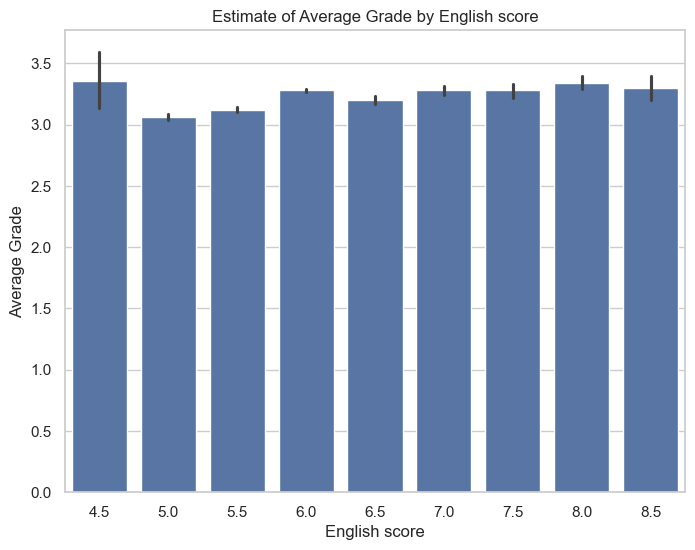

In [48]:
# Bar Plot for english_score vs Average Grade
plt.figure(figsize=(8, 6))
sns.barplot(x='english_score', y='average_grade', data=df)
plt.title('Estimate of Average Grade by English score')
plt.xlabel('English score')
plt.ylabel('Average Grade')
plt.show()

In [49]:
has_scholarship_avg_grade = df.groupby('donor')['average_grade'].mean().reset_index()
has_scholarship_avg_grade

,donor,average_grade
0,Other,3.281820
1,RTG,3.251654
2,selfsupport,3.162604
3,sponsor with mou,2.918185
4,thailand (HMKING & HMQUEEN),3.458900


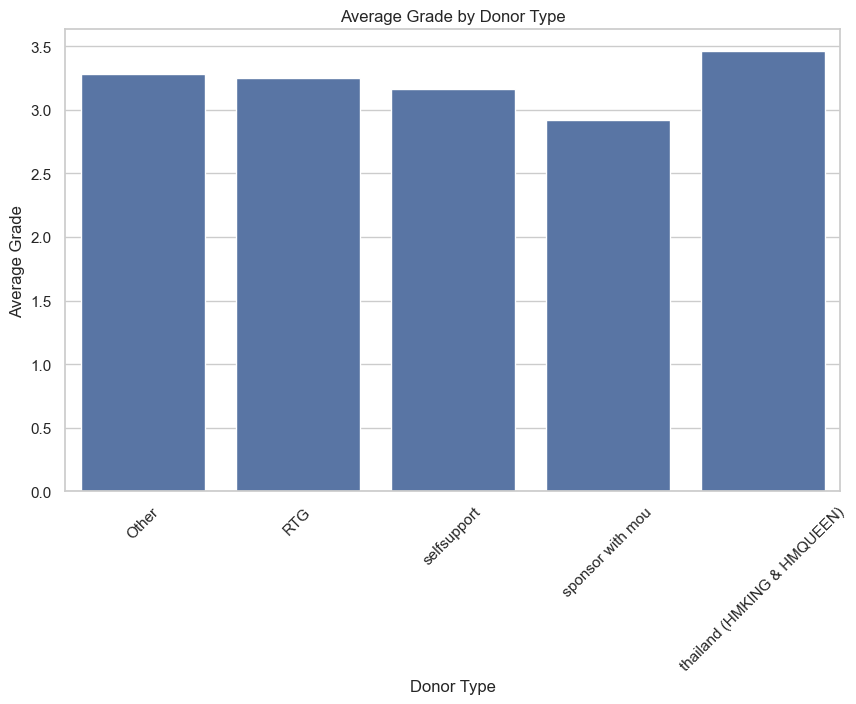

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='donor', y='average_grade', data=has_scholarship_avg_grade)
plt.title('Average Grade by Donor Type')
plt.xlabel('Donor Type')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [51]:
school_avg_grade = df.groupby('school')['average_grade'].mean().reset_index()
school_avg_grade

,school,average_grade
0,SERD,3.278218
1,SET,3.162603
2,SOM,3.367246


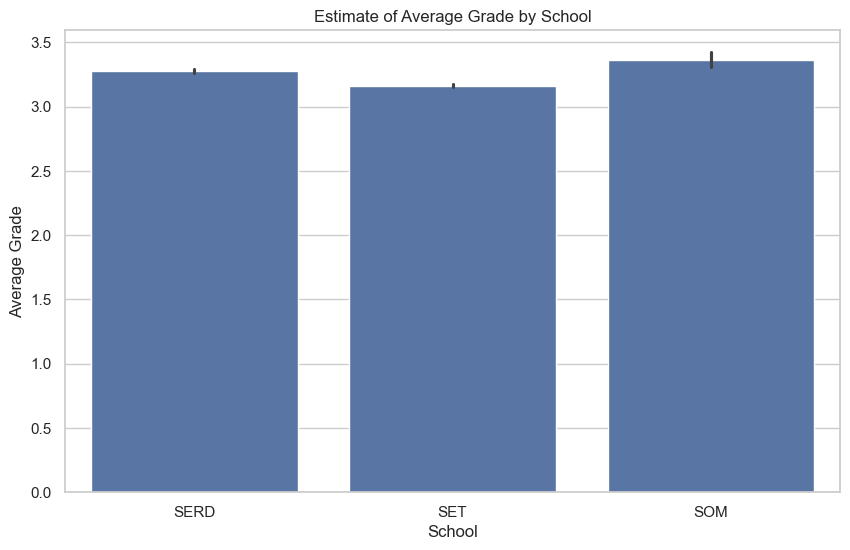

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='school', y='average_grade', data=df)
plt.title('Estimate of Average Grade by School')
plt.xlabel('School')
plt.ylabel('Average Grade')
plt.show()

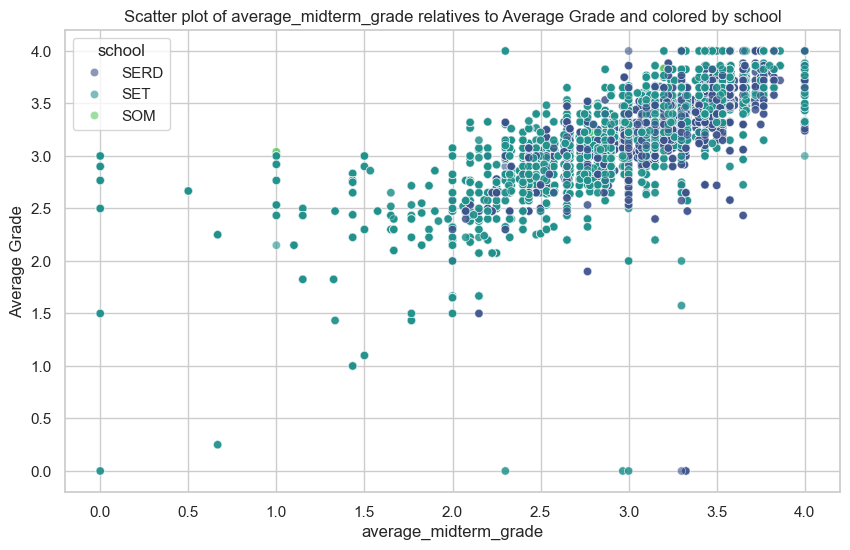

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='average_midterm_grade', y='average_grade', hue='school',alpha=0.6, palette='viridis', data=df,legend='brief')

plt.title('Scatter plot of average_midterm_grade relatives to Average Grade and colored by school')
plt.xlabel('average_midterm_grade')
plt.ylabel('Average Grade')
plt.show()


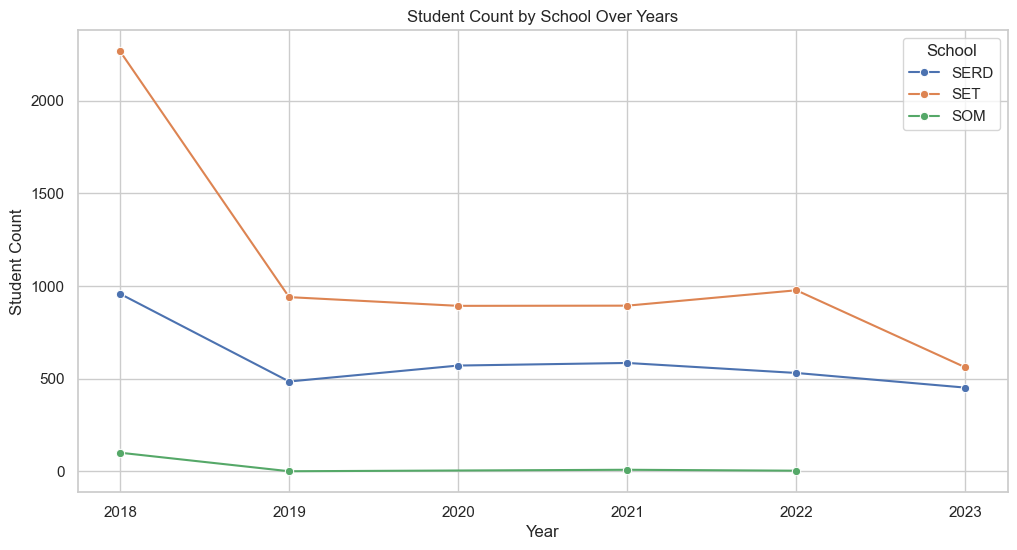

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by school and year, and counting students
student_counts = df.groupby(['school', 'admission_year']).size().reset_index(name='student_count')

# Get unique schools for creating separate lines
schools = student_counts['school'].unique()
plt.figure(figsize=(12, 6))

# Plotting data for each school on the same axes
for school in schools:
    # Filter data for the school
    school_data = student_counts[student_counts['school'] == school]

    sns.lineplot(data=school_data, x='admission_year', y='student_count', marker='o', label=school)

plt.title('Student Count by School Over Years')
plt.xlabel('Year')
plt.ylabel('Student Count')
plt.grid(True)
plt.legend(title='School')
plt.show()

In [55]:
#Box plot for each school


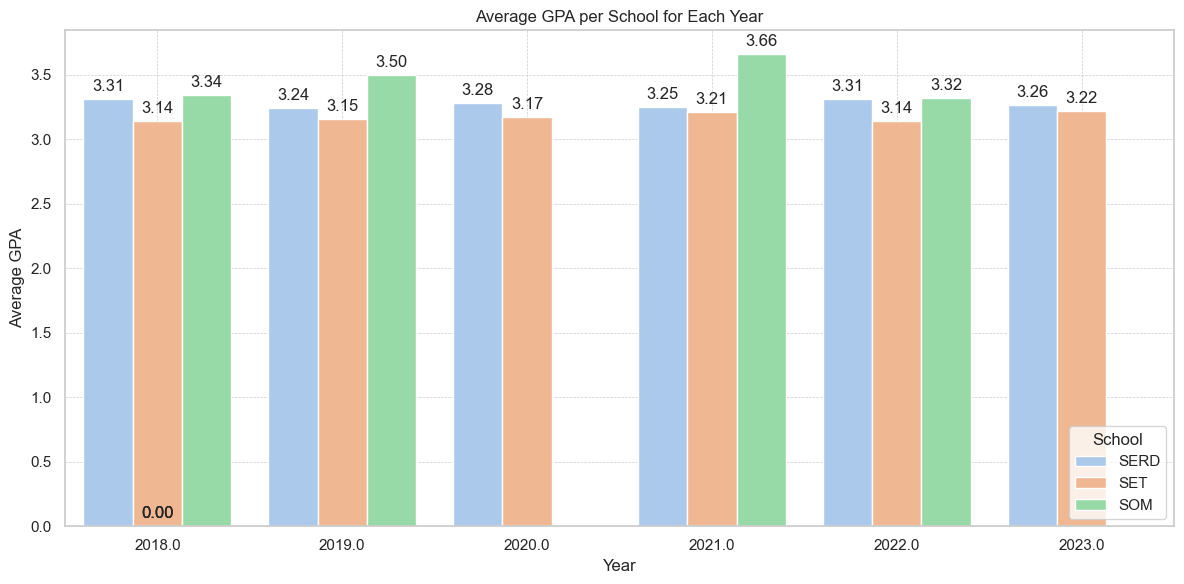

In [56]:
grouped_data = df.groupby(['school', 'admission_year'])['average_grade'].mean().reset_index()
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=grouped_data, x='admission_year', y='average_grade', hue='school', palette='pastel')
plt.title('Average GPA per School for Each Year')
plt.xlabel('Year')
plt.ylabel('Average GPA')

# Adding data labels
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')

plt.legend(title='School')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


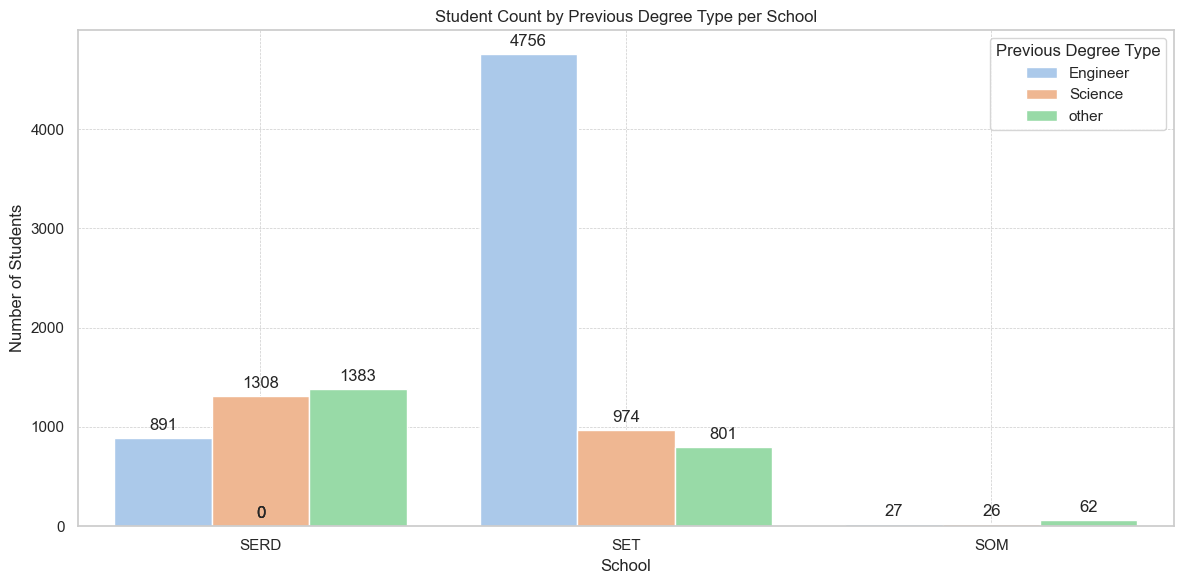

In [57]:
# Group data by school and previous degree type
grouped_data = df.groupby(['school', 'PREVIOUSDEGREE_related']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=grouped_data,
    x='school',
    y='count',
    hue='PREVIOUSDEGREE_related',
    palette='pastel'
)

# Customize plot appearance
plt.title('Student Count by Previous Degree Type per School')
plt.xlabel('School')
plt.ylabel('Number of Students')
plt.legend(title='Previous Degree Type', loc='upper right')

# Add data labels
for p in bar_plot.patches:
    if not pd.isna(p.get_height()):
        height = p.get_height()
        bar_plot.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='center',
            xytext=(0, 9),
            textcoords='offset points'
        )

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

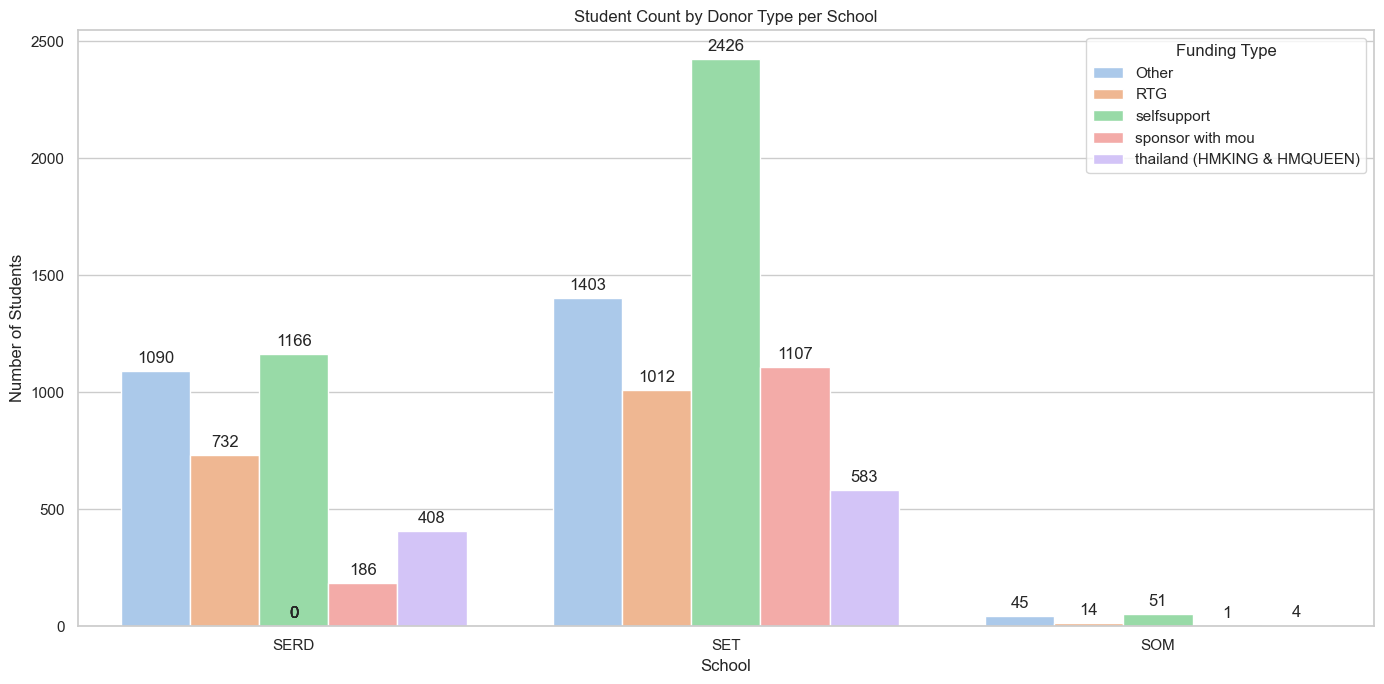

In [58]:
# Group data by school and donor type
grouped_donor = df.groupby(['school', 'donor']).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(
    data=grouped_donor,
    x='school',  
    y='count',     
    hue='donor', 
    palette='pastel'
)

plt.title('Student Count by Donor Type per School')
plt.xlabel('School')
plt.ylabel('Number of Students')
plt.legend(title='Funding Type', loc='upper right')

# Add data labels
for p in bar_plot.patches:
    if not pd.isna(p.get_height()):
        bar_plot.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width()/2, p.get_height()),
            ha='center', va='center',
            xytext=(0, 9),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()

## Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
#label encode gender as well
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'F': 0, 'M': 1}


In [60]:
#label encode marital_status as well
df['maritalstatus'] = le.fit_transform(df['maritalstatus'])
# Retrieve the mapping of classes to numbers
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'Married': 0, 'Single': 1}


In [61]:
#label encode TERM as well
df['first_term'] = le.fit_transform(df['first_term'])
# Retrieve the mapping of classes to numbers
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {np.float64(1.0): 0, np.float64(2.0): 1}


One hot encoding

In [62]:
df = pd.get_dummies(df,columns=['country'],drop_first=True)

In [63]:
df = pd.get_dummies(df,columns=['donor'],drop_first=True)

In [64]:
df = pd.get_dummies(df,columns=['PREVIOUSDEGREE_related'],drop_first=True)

#Correlation heatmap version split school data

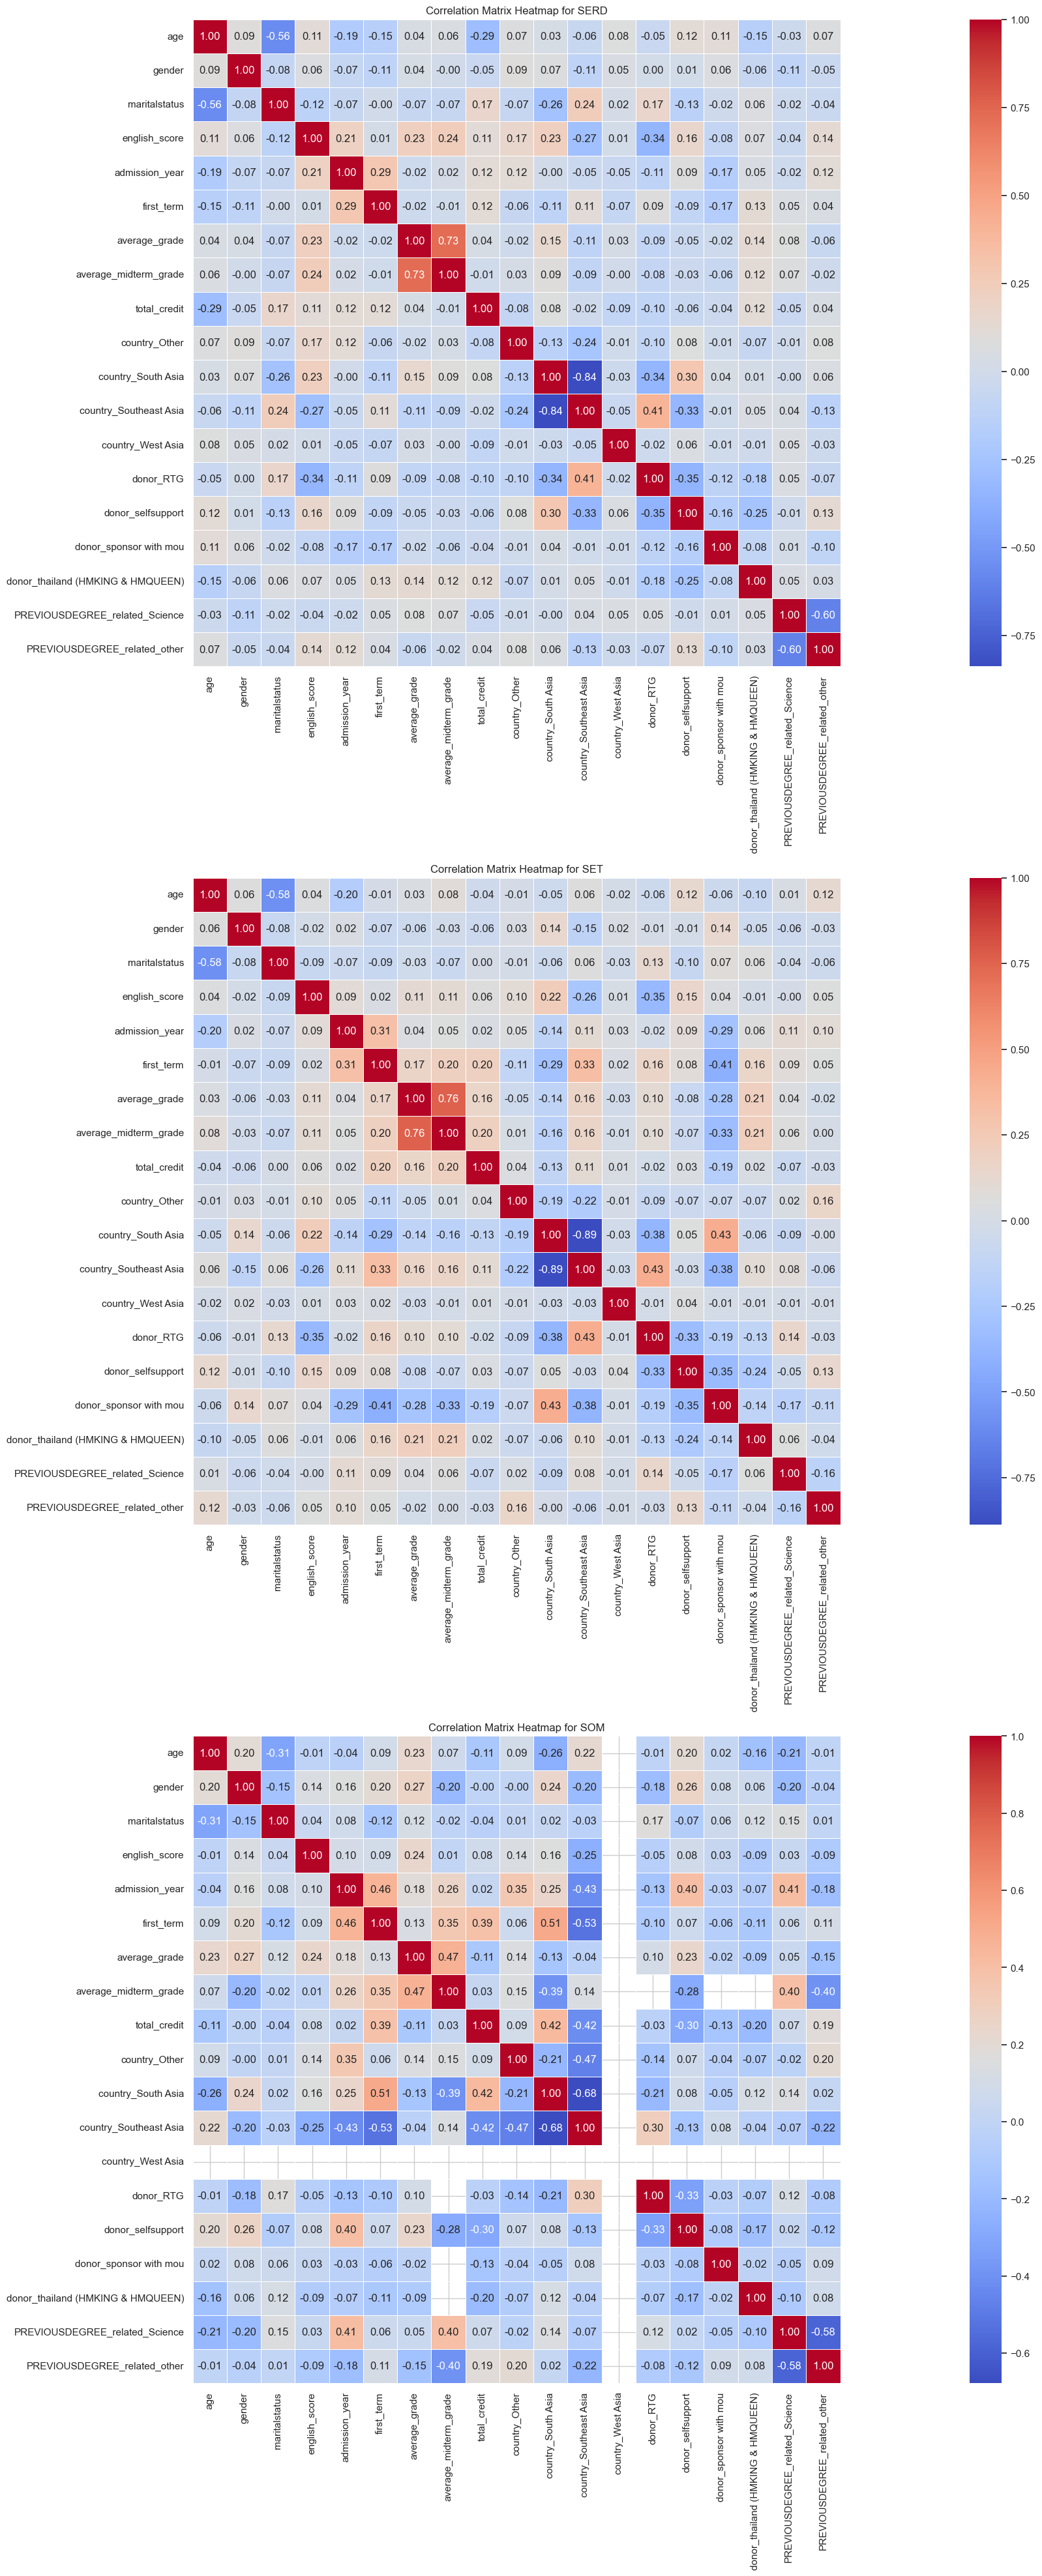

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of schools (replace these with the actual school names in your dataset)
schools = ['SERD', 'SET', 'SOM']

# Set up the figure size for multiple plots
plt.figure(figsize=(40, 50))

# Iterate through each school, compute the correlation matrix, and plot it
for i, school in enumerate(schools, 1):
    school_data = df[df['school'] == school]
    correlation_matrix = school_data[['age', 'gender', 'maritalstatus',
       'english_score', 'admission_year', 'first_term', 'average_grade',
       'average_midterm_grade', 'total_credit', 'country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia',
       'donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)', 'PREVIOUSDEGREE_related_Science',
       'PREVIOUSDEGREE_related_other']].corr()

    plt.subplot(4, 1, i)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
    plt.title(f'Correlation Matrix Heatmap for {school}')

plt.tight_layout()
plt.show()

In [66]:
df.columns

Index(['midterm_grade', 'age', 'gender', 'school', 'maritalstatus',
       'english_score', 'admission_year', 'first_term', 'average_grade',
       'average_midterm_grade', 'total_credit', 'country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia',
       'donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)', 'PREVIOUSDEGREE_related_Science',
       'PREVIOUSDEGREE_related_other'],
      dtype='object')

## Split the dataset

In [67]:
df_set = df[df['school'] == 'SET']
df_serd = df[df['school'] == 'SERD']
df_som = df[df['school'] == 'SOM']

# Feature Selection

In [68]:
#We drop the column that have the low correlation
df_selected_set = df_set[['english_score','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)', 'PREVIOUSDEGREE_related_Science','PREVIOUSDEGREE_related_other']]
df_selected_serd = df_serd[['english_score','first_term','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)' ]]
df_selected_som = df_som[['age', 'gender','english_score', 'first_term','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)','PREVIOUSDEGREE_related_Science','PREVIOUSDEGREE_related_other']]

### Set x and y

In [69]:
X_set = df_selected_set[['english_score','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)', 'PREVIOUSDEGREE_related_Science','PREVIOUSDEGREE_related_other']]
y_set = df_set['average_grade']

In [70]:
X_serd = df_selected_serd[['english_score','first_term','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)' ]]
y_serd = df_serd['average_grade']

In [71]:
X_som = df_selected_som[['age', 'gender','english_score','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)','PREVIOUSDEGREE_related_Science','PREVIOUSDEGREE_related_other']]
y_som = df_som['average_grade']

### Train test split

In [72]:
#Train test split
from sklearn.model_selection import train_test_split
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_set, y_set, test_size = 0.2, random_state = 41)

In [73]:
X_train_serd, X_test_serd, y_train_serd, y_test_serd = train_test_split(X_serd, y_serd, test_size = 0.2, random_state = 41)

In [74]:
X_train_som, X_test_som, y_train_som, y_test_som = train_test_split(X_som, y_som, test_size = 0.2, random_state = 41)

# Preprocessing

## Null Value

In [75]:
X_set.isnull().sum()

english_score                         20
average_midterm_grade                393
country_Other                          0
country_South Asia                     0
country_Southeast Asia                 0
country_West Asia                      0
donor_RTG                              0
donor_selfsupport                      0
donor_sponsor with mou                 0
donor_thailand (HMKING & HMQUEEN)      0
PREVIOUSDEGREE_related_Science         0
PREVIOUSDEGREE_related_other           0
dtype: int64

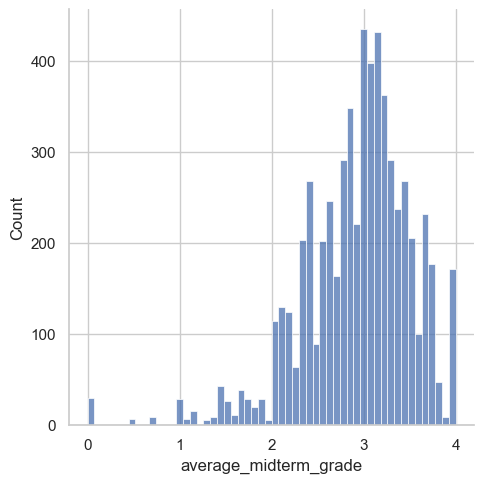

In [76]:
sns.displot(X_set.average_midterm_grade)

In [77]:
X_serd.isnull().sum()

english_score                         0
first_term                            0
average_midterm_grade                84
country_Other                         0
country_South Asia                    0
country_Southeast Asia                0
country_West Asia                     0
donor_RTG                             0
donor_selfsupport                     0
donor_sponsor with mou                0
donor_thailand (HMKING & HMQUEEN)     0
dtype: int64

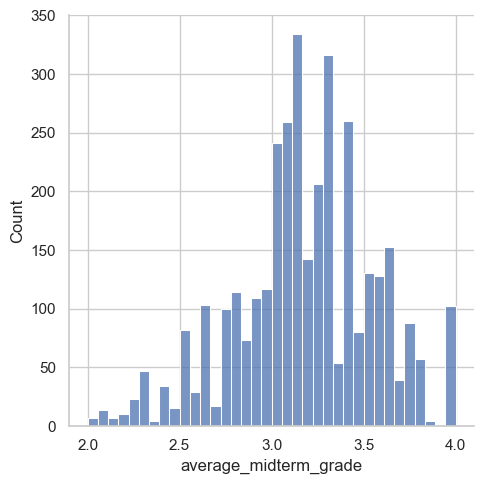

In [78]:
sns.displot(X_serd.average_midterm_grade)

In [79]:
X_som.isnull().sum()

age                                   0
gender                                0
english_score                         3
average_midterm_grade                87
country_Other                         0
country_South Asia                    0
country_Southeast Asia                0
country_West Asia                     0
donor_RTG                             0
donor_selfsupport                     0
donor_sponsor with mou                0
donor_thailand (HMKING & HMQUEEN)     0
PREVIOUSDEGREE_related_Science        0
PREVIOUSDEGREE_related_other          0
dtype: int64

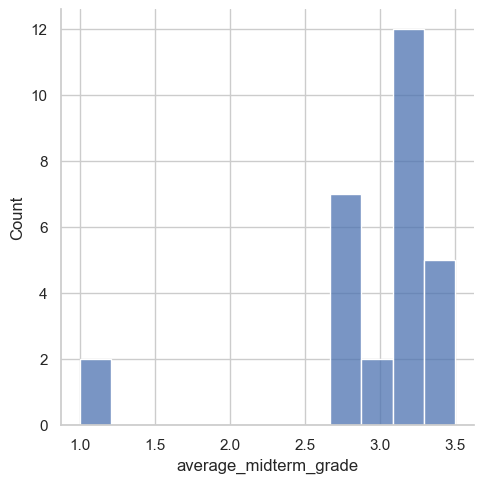

In [80]:
sns.displot(X_som.average_midterm_grade)

# Cross validation 

In [81]:
algorithms = [LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(random_state=41),
              RandomForestRegressor(n_estimators=100, random_state=41),Ridge(random_state=41),Lasso(random_state=41),ElasticNet(random_state=41)]

algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor",
                   "Ridge Regression", "Lasso Regression","ElasticNet"]

In [82]:
# 1) define your preprocessor once (or separate ones if SOM/SERD need different imputation)
preprocessor = ColumnTransformer([
    ('midterm_imp', SimpleImputer(strategy='median'),       ['average_midterm_grade']),
    ('english_imp', SimpleImputer(strategy='most_frequent'), ['english_score']),
], remainder='passthrough')

# 2) pack your datasets into a dict for easy looping
datasets = {
    'SET':  (X_train_set,  y_train_set),
    'SERD': (X_train_serd, y_train_serd),
    'SOM':  (X_train_som,  y_train_som),
}

# 3) CV splitter
kfold = KFold(n_splits=10, shuffle=True, random_state=41)

# 4) loop
for ds_name, (X_tr, y_tr) in datasets.items():
    print(f"\n=== Results on {ds_name} ===")
    mse_scores = []
    r2_scores  = []
    
    for name, alg in zip(algorithm_names, algorithms):
        # build pipeline fresh each time
        pipe = Pipeline([
            ('preproc', preprocessor),
            ('scale',   StandardScaler()),
            ('model',   alg)
        ])
        
        # cross‐val
        neg_mse = cross_val_score(pipe, X_tr, y_tr,
                                  cv=kfold,
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1)
        r2      = cross_val_score(pipe, X_tr, y_tr,
                                  cv=kfold,
                                  scoring='r2',
                                  n_jobs=-1)
        
        mean_mse = -neg_mse.mean()
        mean_r2  = r2.mean()
        
        mse_scores.append(mean_mse)
        r2_scores .append(mean_r2)
        
        print(f"{name:25s} → MSE: {mean_mse:7.4f}, R²: {mean_r2:6.4f}")
    
    # pick best for this dataset
    best_mse_idx = np.argmin(mse_scores)
    best_r2_idx  = np.argmax(r2_scores)
    print(f"\n  ▶ Best by MSE on {ds_name}: {algorithm_names[best_mse_idx]} "
          f"({mse_scores[best_mse_idx]:.4f})")
    print(f"  ▶ Best by R²  on {ds_name}: {algorithm_names[best_r2_idx]} "
          f"({r2_scores [best_r2_idx]:.4f})")


=== Results on SET ===
Linear Regression         → MSE:  0.1110, R²: 0.5269
SVR                       → MSE:  0.1004, R²: 0.5751
KNeighbors Regressor      → MSE:  0.0861, R²: 0.6341
Decision-Tree Regressor   → MSE:  0.0607, R²: 0.7438
Random-Forest Regressor   → MSE:  0.0588, R²: 0.7532
Ridge Regression          → MSE:  0.1110, R²: 0.5269
Lasso Regression          → MSE:  0.2338, R²: -0.0013
ElasticNet                → MSE:  0.2338, R²: -0.0013

  ▶ Best by MSE on SET: Random-Forest Regressor (0.0588)
  ▶ Best by R²  on SET: Random-Forest Regressor (0.7532)

=== Results on SERD ===
Linear Regression         → MSE:  0.0795, R²: 0.4890
SVR                       → MSE:  0.0752, R²: 0.5227
KNeighbors Regressor      → MSE:  0.0712, R²: 0.5417
Decision-Tree Regressor   → MSE:  0.0520, R²: 0.6541
Random-Forest Regressor   → MSE:  0.0461, R²: 0.6981
Ridge Regression          → MSE:  0.0795, R²: 0.4890
Lasso Regression          → MSE:  0.1486, R²: -0.0045
ElasticNet                → MSE:  0.14

# Grid search

### For the set school

SET best params:    {'rf__max_depth': None, 'rf__n_estimators': 21}
SET CV MSE:         0.06014539154518572
SET test MSE:       0.05427774847735842
SET test R²:        0.7824763136497408


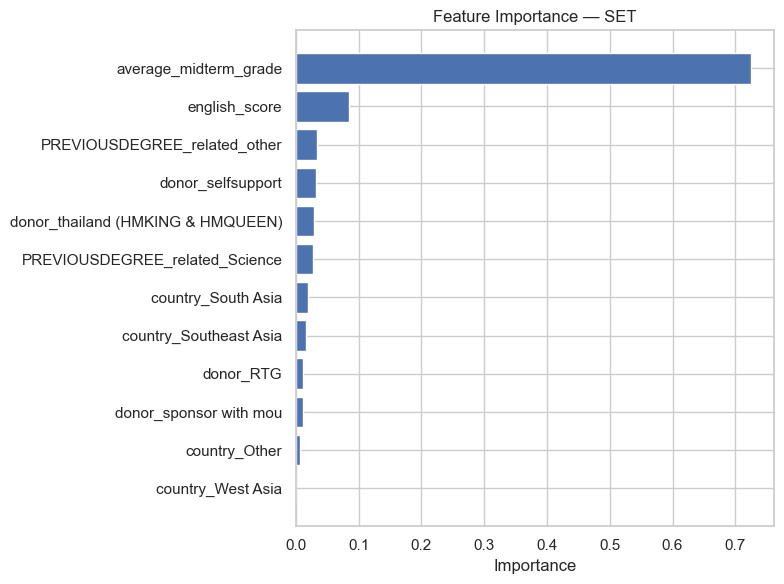

In [83]:
preprocessor_set = ColumnTransformer([
    ('midterm_imp', SimpleImputer(strategy='median'),['average_midterm_grade']),
    ('english_imp', SimpleImputer(strategy='most_frequent'), ['english_score']),
], remainder='passthrough')

pipeline_set = Pipeline([
    ('preproc', preprocessor_set),
    ('scale',   StandardScaler()),
    ('rf',      RandomForestRegressor(random_state=41))
])

param_grid_set = {
    'rf__n_estimators': [5,6,7,8,9,10,11,12,13,15,17,19,21],
    'rf__max_depth':    [5,10,15,None]
}
cv = KFold(n_splits=10, shuffle=True, random_state=41)

grid_set = GridSearchCV(
    pipeline_set,
    param_grid_set,
    cv=cv,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

grid_set.fit(X_train_set, y_train_set)

with open('model/scale_set_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_set.best_estimator_.named_steps['scale'], f)
with open('model/model_set_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_set.best_estimator_, f)


print("SET best params:   ", grid_set.best_params_)
print("SET CV MSE:        ", -grid_set.best_score_)

y_pred_set = grid_set.predict(X_test_set)
print("SET test MSE:      ", mean_squared_error(y_test_set, y_pred_set))
print("SET test R²:       ", r2_score(y_test_set, y_pred_set))


rf_best = grid_set.best_estimator_.named_steps['rf']
imp_set = rf_best.feature_importances_


rest = [c for c in X_train_set.columns
        if c not in ['average_midterm_grade','english_score']]
feature_names = ['average_midterm_grade','english_score'] + rest

order = np.argsort(imp_set)
plt.figure(figsize=(8,6))
plt.barh([feature_names[i] for i in order], imp_set[order])
plt.title("Feature Importance — SET")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

### For the serd school

SERD best params: {'rf__max_depth': None, 'rf__n_estimators': 10}
SERD CV  MSE:   0.0460582694976993
SERD test MSE: 0.05055014152032803
SERD test R²:  0.6472899976773021


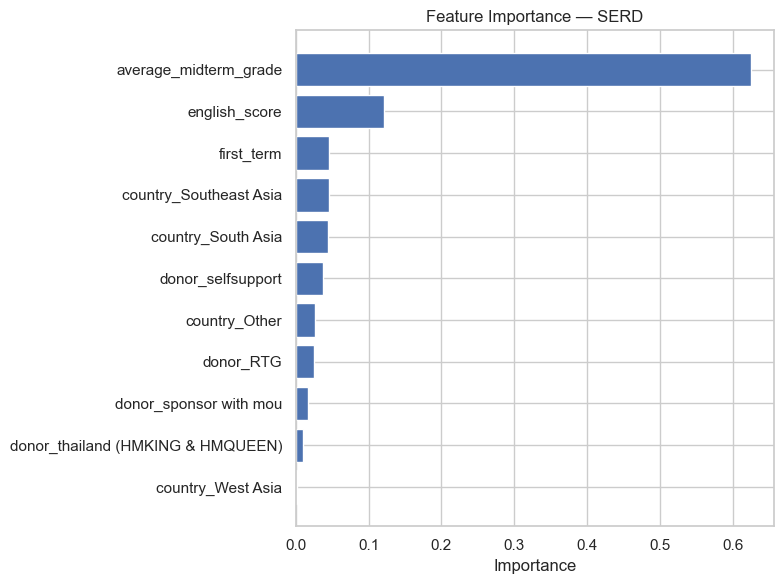

In [84]:
preprocessor_serd = ColumnTransformer([
    ('midterm_imp', SimpleImputer(strategy='median'), ['average_midterm_grade'])
], remainder='passthrough')

pipeline_serd = Pipeline([
    ('preproc', preprocessor_serd),
    ('scale',   StandardScaler()),
    ('rf',      RandomForestRegressor(random_state=41))
])

param_grid_serd = {
    'rf__n_estimators': [5,6,7,8,9,10,11,12,13,15,17,19,21],
    'rf__max_depth':    [5,10,15,None]
}
cv_serd = KFold(n_splits=10, shuffle=True, random_state=41)

grid_serd = GridSearchCV(
    pipeline_serd,
    param_grid_serd,
    cv=cv_serd,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)


grid_serd.fit(X_train_serd, y_train_serd)

y_pred_serd = grid_serd.predict(X_test_serd)
print("SERD best params:", grid_serd.best_params_)
print("SERD CV  MSE:  ", -grid_serd.best_score_)
print("SERD test MSE:", mean_squared_error(y_test_serd, y_pred_serd))
print("SERD test R²: ",  r2_score(y_test_serd, y_pred_serd))


with open('model/scale_serd_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_serd.best_estimator_.named_steps['scale'], f)
with open('model/model_serd_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_serd.best_estimator_, f)


rf_serd_best = grid_serd.best_estimator_.named_steps['rf']
imps_serd = rf_serd_best.feature_importances_

others = [c for c in X_train_serd.columns if c!='average_midterm_grade']
feat_names_serd = ['average_midterm_grade'] + others
order_serd = np.argsort(imps_serd)

plt.figure(figsize=(8,6))
plt.barh([feat_names_serd[i] for i in order_serd], imps_serd[order_serd])
plt.title("Feature Importance — SERD")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

### For the som school

SOM best params: {'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 50, 'knn__weights': 'distance'}
SOM CV  MSE:   0.0769495461384702
SOM test MSE: 0.13460126086288315
SOM test R²:  0.019767575252309433


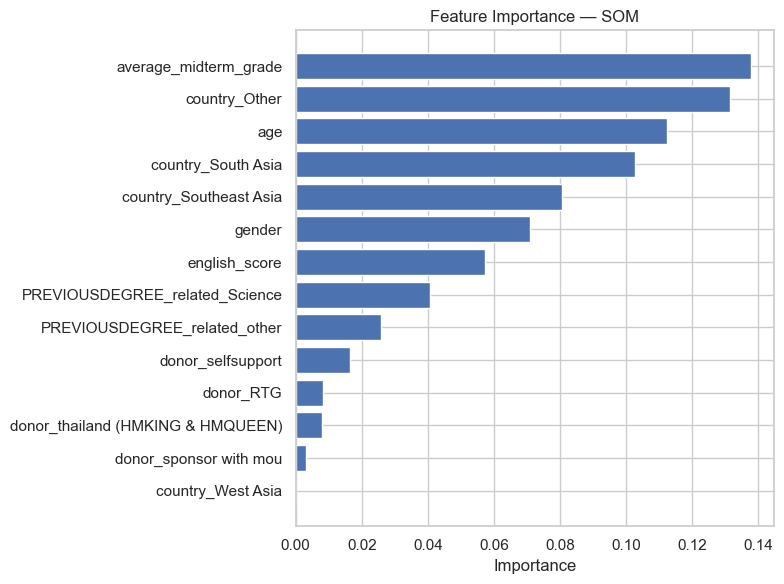

In [85]:
preprocessor_som = ColumnTransformer([
    ('midterm_imp', SimpleImputer(strategy='median'),       ['average_midterm_grade']),
    ('english_imp', SimpleImputer(strategy='most_frequent'), ['english_score']),
], remainder='passthrough')

pipeline_som = Pipeline([
    ('preproc', preprocessor_som),
    ('scale',   StandardScaler()),
    ('knn',     KNeighborsRegressor())
])

param_grid_som = {
    'knn__n_neighbors': [3, 5, 7, 10, 15, 20, 30 , 50],
    'knn__weights':     ['uniform', 'distance'],
    'knn__algorithm':   ['auto', 'ball_tree', 'kd_tree', 'brute']
}

cv_som = KFold(n_splits=10, shuffle=True, random_state=41)

grid_som = GridSearchCV(
    pipeline_som,
    param_grid_som,
    cv=cv_som,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

grid_som.fit(X_train_som, y_train_som)

y_pred_som = grid_som.predict(X_test_som)
print("SOM best params:", grid_som.best_params_)
print("SOM CV  MSE:  ", -grid_som.best_score_)
print("SOM test MSE:", mean_squared_error(y_test_som, y_pred_som))
print("SOM test R²: ",  r2_score(y_test_som, y_pred_som))

with open('model/scale_som_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_som.best_estimator_.named_steps['scale'], f)
with open('model/model_som_pipeline.pkl', 'wb') as f:
    pickle.dump(grid_som.best_estimator_, f)

perm_som = permutation_importance(
    grid_som.best_estimator_,
    X_test_som, y_test_som,
    n_repeats=10, random_state=41, n_jobs=-1
)
imp_som = perm_som.importances_mean
names_som = X_train_som.columns.tolist()
order_som = np.argsort(imp_som)

plt.figure(figsize=(8,6))
plt.barh([names_som[i] for i in order_som], imp_som[order_som])
plt.title("Feature Importance — SOM")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Inference


In [86]:
pipe_set  = pickle.load(open('model/model_set_pipeline.pkl',  'rb'))
pipe_serd = pickle.load(open('model/model_serd_pipeline.pkl', 'rb'))
pipe_som  = pickle.load(open('model/model_som_pipeline.pkl',  'rb'))

### for set

In [87]:
df_set[['english_score','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)', 'PREVIOUSDEGREE_related_Science','PREVIOUSDEGREE_related_other']].iloc[0]

english_score                          6.0
average_midterm_grade                 2.65
country_Other                        False
country_South Asia                    True
country_Southeast Asia               False
country_West Asia                    False
donor_RTG                            False
donor_selfsupport                    False
donor_sponsor with mou               False
donor_thailand (HMKING & HMQUEEN)    False
PREVIOUSDEGREE_related_Science       False
PREVIOUSDEGREE_related_other         False
Name: 2, dtype: object

In [88]:
sample_set = {
    'english_score': 6,
    'average_midterm_grade': 2.65,
    'country_Other': False,
    'country_South Asia': True,
    'country_Southeast Asia': False,
    'country_West Asia': False,
    'donor_RTG': False,
    'donor_selfsupport': False,
    'donor_sponsor with mou': False,
    'donor_thailand (HMKING & HMQUEEN)': False,
    'PREVIOUSDEGREE_related_Science': False,
    'PREVIOUSDEGREE_related_other': False
}
df_set = pd.DataFrame([sample_set])

In [89]:
pred_set  = pipe_set .predict(df_set)
print(f"Predicted SET grade:  {pred_set[0]:.3f}")

Predicted SET grade:  3.101


### for serd

In [90]:
df_serd[['english_score','first_term','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)']].iloc[0]

english_score                          7.0
first_term                               1
average_midterm_grade                  3.5
country_Other                        False
country_South Asia                    True
country_Southeast Asia               False
country_West Asia                    False
donor_RTG                            False
donor_selfsupport                     True
donor_sponsor with mou               False
donor_thailand (HMKING & HMQUEEN)    False
Name: 0, dtype: object

In [91]:
sample_serd = {
    'english_score': 7,
    'first_term': 1,
    'average_midterm_grade': 3.5,
    'country_Other': False,
    'country_South Asia': True,
    'country_Southeast Asia': False,
    'country_West Asia': False,
    'donor_RTG': False,
    'donor_selfsupport': False,
    'donor_sponsor with mou': True,
    'donor_thailand (HMKING & HMQUEEN)': False
}
df_serd = pd.DataFrame([sample_serd])

In [92]:
pred_serd = pipe_serd.predict(df_serd)
print(f"Predicted SERD grade: {pred_serd[0]:.3f}")

Predicted SERD grade: 3.863


### for som

In [93]:
df_som[['age', 'gender','english_score','average_midterm_grade','country_Other',
       'country_South Asia', 'country_Southeast Asia', 'country_West Asia','donor_RTG', 'donor_selfsupport', 'donor_sponsor with mou',
       'donor_thailand (HMKING & HMQUEEN)','PREVIOUSDEGREE_related_Science','PREVIOUSDEGREE_related_other']].iloc[27]

age                                      44.0
gender                                      0
english_score                             5.5
average_midterm_grade                2.866667
country_Other                           False
country_South Asia                      False
country_Southeast Asia                   True
country_West Asia                       False
donor_RTG                               False
donor_selfsupport                       False
donor_sponsor with mou                  False
donor_thailand (HMKING & HMQUEEN)       False
PREVIOUSDEGREE_related_Science          False
PREVIOUSDEGREE_related_other             True
Name: 1819, dtype: object

In [94]:
sample_som = {
    'age': 44,
    'gender': 0,
    'english_score': 5.5,
    'average_midterm_grade': 2.87,
    'country_Other': False,
    'country_South Asia': False,
    'country_Southeast Asia': True,
    'country_West Asia': False,
    'donor_RTG': False,
    'donor_selfsupport': False,
    'donor_sponsor with mou': False,
    'donor_thailand (HMKING & HMQUEEN)': False,
    'PREVIOUSDEGREE_related_Science': False,
    'PREVIOUSDEGREE_related_other': True
}
df_som = pd.DataFrame([sample_som])

In [95]:
pred_som  = pipe_som .predict(df_som)
print(f"Predicted SOM grade:  {pred_som[0]:.3f}")

Predicted SOM grade:  3.073


# Create the default value

### for set

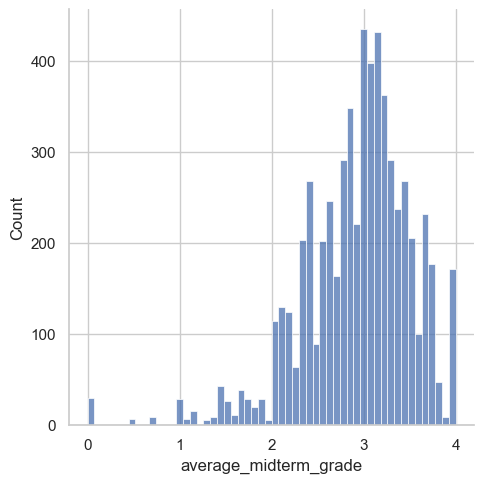

In [96]:
sns.displot(X_set.average_midterm_grade)

In [97]:
english_mode = df_set['english_score'].mode().iloc[0]
grade_median = df_set['average_midterm_grade'].median()

default_value_set = {
    'english_score': english_mode,
    'average_midterm_grade': grade_median,
    'country_Other': False,
    'country_South Asia': False,
    'country_Southeast Asia': True,
    'country_West Asia': False,
    'donor_RTG': False,
    'donor_selfsupport': True,
    'donor_sponsor with mou': False,
    'donor_thailand (HMKING & HMQUEEN)': False,
    'PREVIOUSDEGREE_related_Science': False,
    'PREVIOUSDEGREE_related_other': False
}


# Print results
print('Default values are:')
for key, value in default_value_set.items():
    print(f"{key}: {value}")

# Save to disk
filename = 'model/default_value_set.pkl'
pickle.dump(default_value_set, open(filename, 'wb'))

Default values are:
english_score: 6
average_midterm_grade: 2.65
country_Other: False
country_South Asia: False
country_Southeast Asia: True
country_West Asia: False
donor_RTG: False
donor_selfsupport: True
donor_sponsor with mou: False
donor_thailand (HMKING & HMQUEEN): False
PREVIOUSDEGREE_related_Science: False
PREVIOUSDEGREE_related_other: False


### For serd

In [98]:
english_mode = df_serd['english_score'].mode().iloc[0]
first_term = df_serd['first_term'].mode().iloc[0]
grade_median = df_serd['average_midterm_grade'].median()

default_value_serd = {
    'english_score': english_mode,
    'first_term' : first_term,
    'average_midterm_grade': grade_median,
    'country_Other': False,
    'country_South Asia': False,
    'country_Southeast Asia': True,
    'country_West Asia': False,
    'donor_RTG': False,
    'donor_selfsupport': True,
    'donor_sponsor with mou': False,
    'donor_thailand (HMKING & HMQUEEN)': False
}

# Print results
print('Default values are:')
for key, value in default_value_serd.items():
    print(f"{key}: {value}")

# Save to disk
filename = 'model/default_value_serd.pkl'
pickle.dump(default_value_serd, open(filename, 'wb'))

Default values are:
english_score: 7
first_term: 1
average_midterm_grade: 3.5
country_Other: False
country_South Asia: False
country_Southeast Asia: True
country_West Asia: False
donor_RTG: False
donor_selfsupport: True
donor_sponsor with mou: False
donor_thailand (HMKING & HMQUEEN): False


### For som

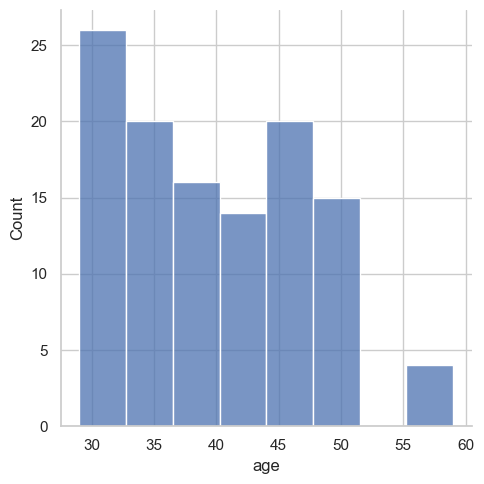

In [99]:
sns.displot(X_som.age)

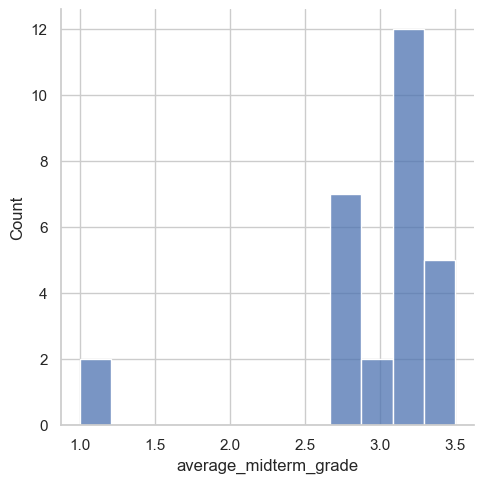

In [100]:
sns.displot(X_som.average_midterm_grade)

In [101]:
age = df_som['age'].median()
gender = df_som['gender'].mode().iloc[0]
english_mode = df_som['english_score'].mode().iloc[0]
grade_median = df_som['average_midterm_grade'].median()

default_value_som = {
    'age': age,
    'gender': gender,
    'english_score': english_mode,
    'average_midterm_grade': grade_median,
    'country_Other': False,
    'country_South Asia': False,
    'country_Southeast Asia': True,
    'country_West Asia': False,
    'donor_RTG': False,
    'donor_selfsupport': True,
    'donor_sponsor with mou': False,
    'donor_thailand (HMKING & HMQUEEN)': False,
    'PREVIOUSDEGREE_related_Science': False,
    'PREVIOUSDEGREE_related_other': False
}

# Print results
print('Default values are:')
for key, value in default_value_som.items():
    print(f"{key}: {value}")
    
# Save to disk
filename = 'model/default_value_som.pkl'
pickle.dump(default_value_som, open(filename, 'wb'))

Default values are:
age: 44.0
gender: 0
english_score: 5.5
average_midterm_grade: 2.87
country_Other: False
country_South Asia: False
country_Southeast Asia: True
country_West Asia: False
donor_RTG: False
donor_selfsupport: True
donor_sponsor with mou: False
donor_thailand (HMKING & HMQUEEN): False
PREVIOUSDEGREE_related_Science: False
PREVIOUSDEGREE_related_other: False
